<a href="https://colab.research.google.com/github/syarifahrmdhn/employee-attrition/blob/main/Employee_Attrition_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting environment

In [ ]:
#Library section
import pandas as pd 
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import itertools
from plotly.subplots import make_subplots

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.colors as colors
from sklearn.svm import SVC

from scipy.stats import f_oneway
from scipy.stats import ttest_ind

from scipy.interpolate import make_interp_spline, BSpline

from sklearn.tree import DecisionTreeClassifier
from datetime import datetime as dt

pd.set_option('display.max_columns', 0) #this allow us to visualize all columns

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



# Data Import

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/akhmadiz/runtemp/main/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Data Brief

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df. shape

(1470, 35)

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

It's shown that there is an imbalance problem at the data

# Removing variables

Variabel "Employee Count", "Over18", dan "StandarHours" dihilangkan karena mempunyai nilai yang seragam (semua data memiliki nilai yang sama), sedangkan variabel "Employee Number" dihilangkan karena mempunyai nilai yang beragam (semua data memiliki nilai yang berbeda).

In [ ]:
df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1, inplace=True)

In [ ]:
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
833,27,No,Travel_Rarely,199,Research & Development,6,3,Life Sciences,4,Male,55,2,1,Research Scientist,3,Married,2539,7950,1,No,13,3,3,1,4,0,3,4,2,2,2
623,30,No,Travel_Frequently,1012,Research & Development,5,4,Life Sciences,2,Male,75,2,1,Research Scientist,4,Divorced,3761,2373,9,No,12,3,2,1,10,3,2,5,4,0,3
1153,18,Yes,Travel_Frequently,544,Sales,3,2,Medical,2,Female,70,3,1,Sales Representative,4,Single,1569,18420,1,Yes,12,3,3,0,0,2,4,0,0,0,0
539,50,No,Travel_Rarely,316,Sales,8,4,Marketing,4,Male,54,3,1,Sales Representative,2,Married,3875,9983,7,No,15,3,4,1,4,2,3,2,2,2,2
133,41,No,Travel_Rarely,802,Sales,9,1,Life Sciences,3,Male,96,3,3,Sales Executive,3,Divorced,8189,21196,3,Yes,13,3,3,1,12,2,3,9,7,0,7


# EDA

## EDA 2 Dimensi

### Relationship with Manager

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, 'Freq')

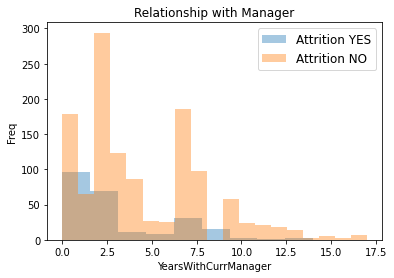

In [ ]:
sns.distplot(df[df["Attrition"]=="Yes"]["YearsWithCurrManager"],hist = True, kde = False, label="Attrition YES")
sns.distplot(df[df["Attrition"]=="No"]["YearsWithCurrManager"],hist = True, kde = False, label="Attrition NO")
plt.legend(prop={'size': 12})
plt.title('Relationship with Manager')
plt.xlabel('YearsWithCurrManager')
plt.ylabel('Freq')

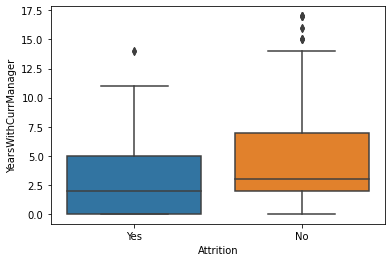

In [ ]:
sns.boxplot( x=df["Attrition"], y=df["YearsWithCurrManager"] )

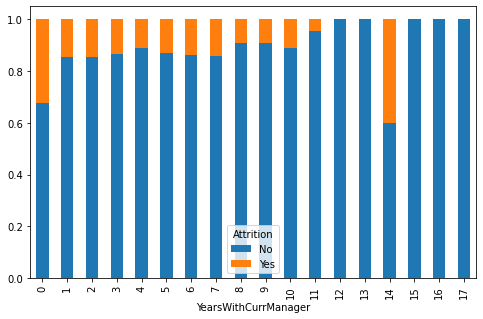

In [ ]:
CT = pd.crosstab(index=df["YearsWithCurrManager"], columns=df["Attrition"])
CT = CT.div(CT.sum(1), axis=0)
CT = CT.plot(kind="bar", figsize=(8,5), stacked=True)

#### t-test

In [ ]:
def compare_2_groups(arr_1, arr_2, alpha, sample_size):
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

In [ ]:
sample_size = 200
x1_sampled = np.random.choice(df[df["Attrition"]=="Yes"]["YearsWithCurrManager"], sample_size)
x2_sampled = np.random.choice(df[df["Attrition"]=="No"]["YearsWithCurrManager"], sample_size)
compare_2_groups(x1_sampled, x2_sampled, 0.05, sample_size)

Statistics=-3.571, p=0.000
Different distributions (reject H0)


Terbukti bahwa pegawai yang keluar memiliki nilai YearsWithCurrManagernya berbeda dengan yang tidak keluar.

### Relationship of Satisfaction

In [ ]:
df['Satisfaction']=df['EnvironmentSatisfaction']*df['JobSatisfaction']*df['RelationshipSatisfaction']

In [ ]:
df['Satisfaction'].describe()

count    1470.000000
mean       20.117007
std        15.134745
min         1.000000
25%         8.000000
50%        16.000000
75%        32.000000
max        64.000000
Name: Satisfaction, dtype: float64

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Satisfaction
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,8
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,24
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,24
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,36
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,8


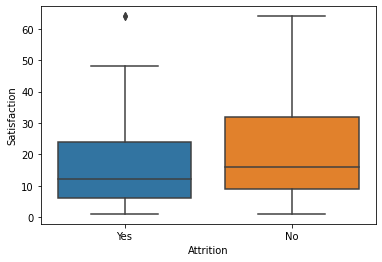

In [ ]:
sns.boxplot( x=df["Attrition"], y=df["Satisfaction"] )

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, 'Freq')

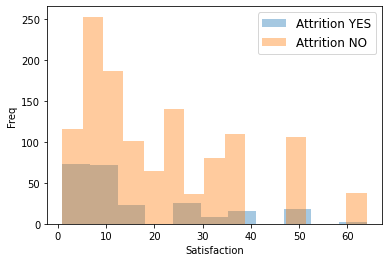

In [ ]:
sns.distplot(df[df["Attrition"]=="Yes"]["Satisfaction"],hist = True, kde = False, label="Attrition YES")
sns.distplot(df[df["Attrition"]=="No"]["Satisfaction"],hist = True, kde = False, label="Attrition NO")
plt.legend(prop={'size': 12})
# plt.title('Relationship with Manager')
plt.xlabel('Satisfaction')
plt.ylabel('Freq')

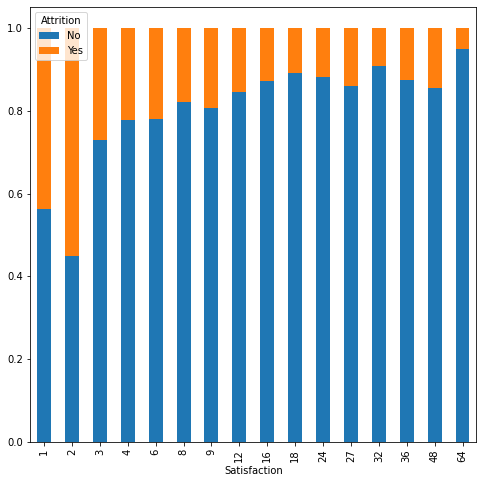

In [ ]:
CT = pd.crosstab(index=df["Satisfaction"], columns=df["Attrition"])
CT = CT.div(CT.sum(1), axis=0)
CT = CT.plot(kind="bar", figsize=(8,8), stacked=True)

#### t-test

In [ ]:
sample_size = 150
x1_sampled = np.random.choice(df[df["Attrition"]=="Yes"]["Satisfaction"], sample_size)
x2_sampled = np.random.choice(df[df["Attrition"]=="No"]["Satisfaction"], sample_size)
compare_2_groups(x1_sampled, x2_sampled, 0.05, sample_size)

Statistics=-4.031, p=0.000
Different distributions (reject H0)


Terbukti bahwa pegawai yang keluar memiliki nilai Satisfaction yang berbeda dibandingkan pegawai yang tidak keluar.

### Relationship between Individual Satisfaction and attrition

#### EnvironmentSatisfaction

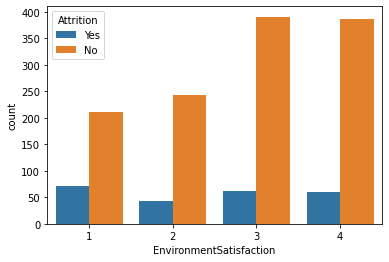

In [ ]:
sns.countplot(x='EnvironmentSatisfaction',data=df, hue='Attrition')

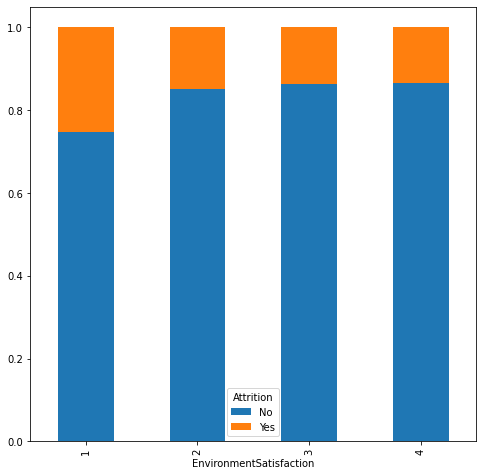

In [ ]:
CT = pd.crosstab(index=df["EnvironmentSatisfaction"], columns=df["Attrition"])
CT = CT.div(CT.sum(1), axis=0)
CT = CT.plot(kind="bar", figsize=(8,8), stacked=True)

##### t-test

In [ ]:
sample_size = 150
x1_sampled = np.random.choice(df[df["Attrition"]=="Yes"]["EnvironmentSatisfaction"], sample_size)
x2_sampled = np.random.choice(df[df["Attrition"]=="No"]["EnvironmentSatisfaction"], sample_size)
compare_2_groups(x1_sampled, x2_sampled, 0.05, sample_size)

Statistics=-3.007, p=0.003
Different distributions (reject H0)


#### JobSatisfaction

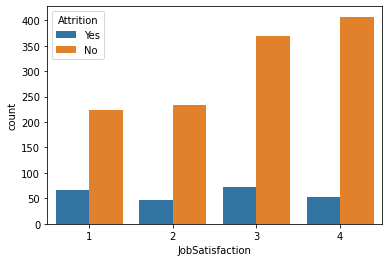

In [ ]:
sns.countplot(x='JobSatisfaction',data=df, hue='Attrition')

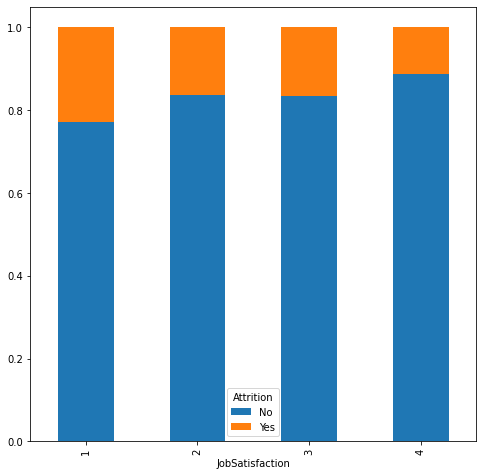

In [ ]:
CT = pd.crosstab(index=df["JobSatisfaction"], columns=df["Attrition"])
CT = CT.div(CT.sum(1), axis=0)
CT = CT.plot(kind="bar", figsize=(8,8), stacked=True)

##### t-test

In [ ]:
sample_size = 150
x1_sampled = np.random.choice(df[df["Attrition"]=="Yes"]["JobSatisfaction"], sample_size)
x2_sampled = np.random.choice(df[df["Attrition"]=="No"]["JobSatisfaction"], sample_size)
compare_2_groups(x1_sampled, x2_sampled, 0.05, sample_size)

Statistics=-2.896, p=0.004
Different distributions (reject H0)


#### RelationshipSatisfaction

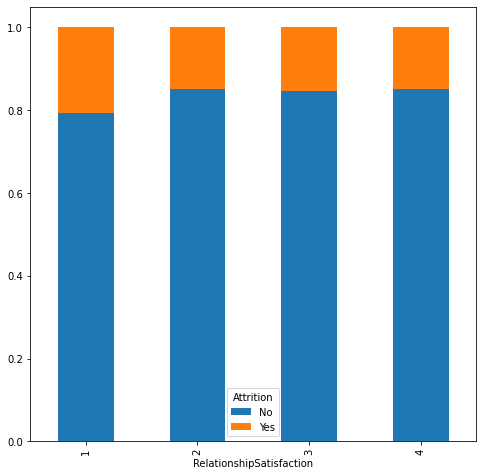

In [ ]:
CT = pd.crosstab(index=df["RelationshipSatisfaction"], columns=df["Attrition"])
CT = CT.div(CT.sum(1), axis=0)
CT = CT.plot(kind="bar", figsize=(8,8), stacked=True)

##### t-test

In [ ]:
sample_size = 150
x1_sampled = np.random.choice(df[df["Attrition"]=="Yes"]["RelationshipSatisfaction"], sample_size)
x2_sampled = np.random.choice(df[df["Attrition"]=="No"]["RelationshipSatisfaction"], sample_size)
compare_2_groups(x1_sampled, x2_sampled, 0.05, sample_size)

Statistics=-2.304, p=0.022
Different distributions (reject H0)


### Relationship between salary and attrition

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, 'Freq')

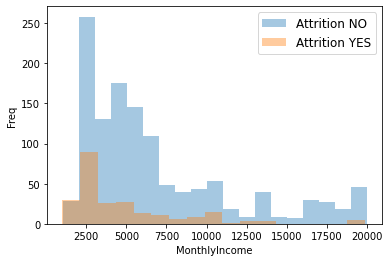

In [ ]:
sns.distplot(df[df["Attrition"]=="No"]["MonthlyIncome"],hist = True, kde = False, label="Attrition NO")
sns.distplot(df[df["Attrition"]=="Yes"]["MonthlyIncome"],hist = True, kde = False, label="Attrition YES")
plt.legend(prop={'size': 12})
# plt.title('Relationship with Manager')
plt.xlabel('MonthlyIncome')
plt.ylabel('Freq')

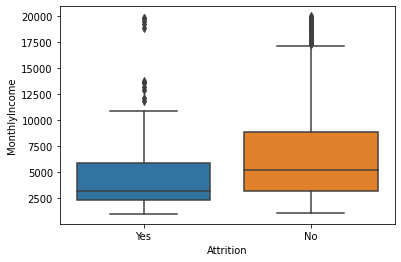

In [ ]:
sns.boxplot( x=df["Attrition"], y=df["MonthlyIncome"] )

##### t-test

In [ ]:
sample_size = 30
x1_sampled = np.random.choice(df[df["Attrition"]=="Yes"]["MonthlyIncome"], sample_size)
x2_sampled = np.random.choice(df[df["Attrition"]=="No"]["MonthlyIncome"], sample_size)
compare_2_groups(x1_sampled, x2_sampled, 0.05, sample_size)

Statistics=-3.468, p=0.001
Different distributions (reject H0)


### Relationship between overtime and attrition

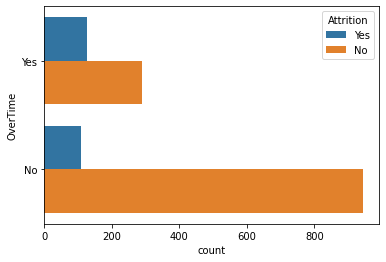

In [ ]:
sns.countplot(y='OverTime',data=df, hue='Attrition')

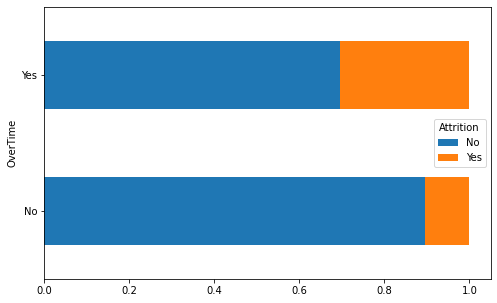

In [ ]:
CT = pd.crosstab(index=df["OverTime"], columns=df["Attrition"])
CT = CT.div(CT.sum(1), axis=0)
CT = CT.plot(kind="barh", figsize=(8,5), stacked=True)

### Relationship between PerformanceRating and attrition

In [ ]:
df['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

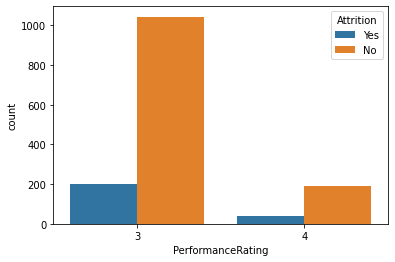

In [ ]:
ax = sns.countplot(x = 'PerformanceRating', hue = 'Attrition', data =df)

### Relationship between YearsSinceLastPromotion and attrition

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, 'Freq')

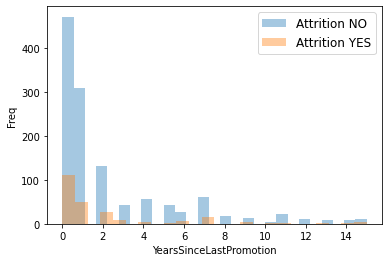

In [ ]:
sns.distplot(df[df["Attrition"]=="No"]["YearsSinceLastPromotion"],hist = True, kde = False, label="Attrition NO")
sns.distplot(df[df["Attrition"]=="Yes"]["YearsSinceLastPromotion"],hist = True, kde = False, label="Attrition YES")
plt.legend(prop={'size': 12})
# plt.title('Relationship with Manager')
plt.xlabel('YearsSinceLastPromotion')
plt.ylabel('Freq')

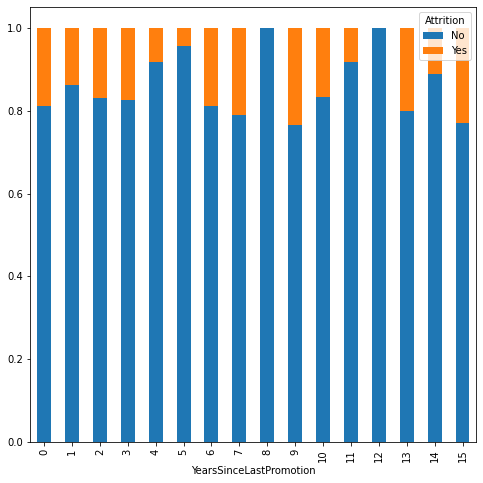

In [ ]:
CT = pd.crosstab(index=df["YearsSinceLastPromotion"], columns=df["Attrition"])
CT = CT.div(CT.sum(1), axis=0)
CT = CT.plot(kind="bar", figsize=(8,8), stacked=True)

##### t-test

In [ ]:
sample_size = 150
x1_sampled = np.random.choice(df[df["Attrition"]=="Yes"]["YearsSinceLastPromotion"], sample_size)
x2_sampled = np.random.choice(df[df["Attrition"]=="No"]["YearsSinceLastPromotion"], sample_size)
compare_2_groups(x1_sampled, x2_sampled, 0.05, sample_size)

Statistics=-0.879, p=0.380
Same distributions (fail to reject H0)


## Percent Salary Hike

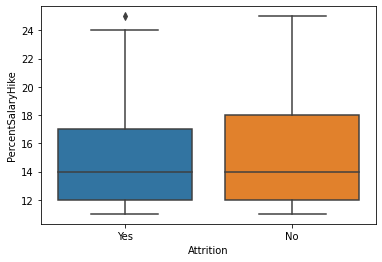

In [ ]:
sns.boxplot( x=df["Attrition"], y=df["PercentSalaryHike"] )

## NumCompaniesWorked



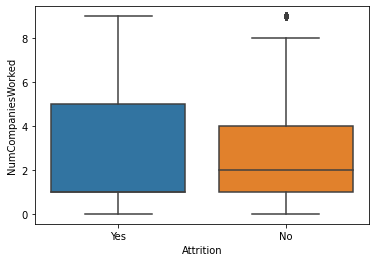

In [ ]:
sns.boxplot( x=df["Attrition"], y=df["NumCompaniesWorked"] )

## TrainingTimeLastYear



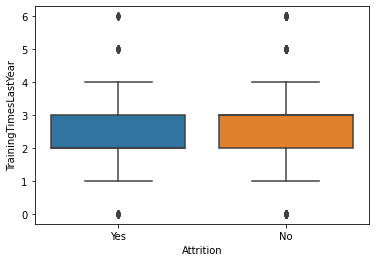

In [ ]:
sns.boxplot( x=df["Attrition"], y=df["TrainingTimesLastYear"] )

## EDA 3 Dimensi

### Relationship between WorkLifeBalance, OverTime, and Attrition

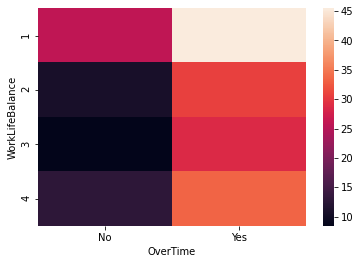

In [ ]:
c = df[df['Attrition']=='Yes'].groupby(["WorkLifeBalance", "OverTime"]).size().unstack()
d = df.groupby(["WorkLifeBalance", "OverTime"]).size().unstack()
e = (c/d)*100
sns.heatmap(e)

### Relationship between OverTime, Salary, and Attrition

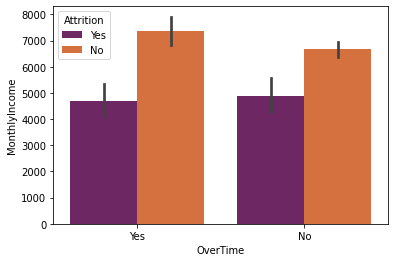

In [ ]:
sns.barplot(x = 'OverTime', y='MonthlyIncome', hue = 'Attrition', data = df, palette="inferno")

### Relationship between PercentSalaryHike, YearsAtCompany, and Attrition

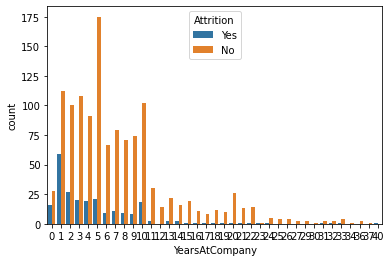

In [ ]:
sns.countplot(x='YearsAtCompany',data=df, hue='Attrition')

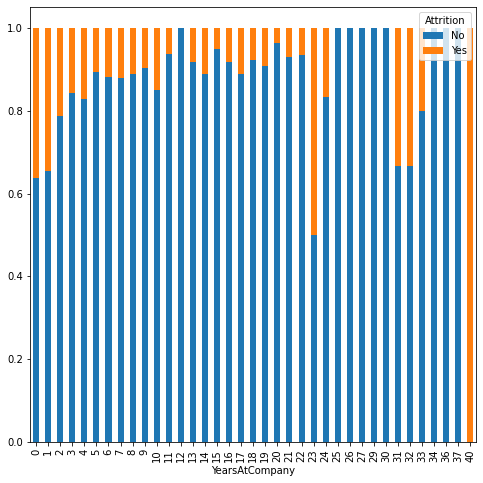

In [ ]:
CT = pd.crosstab(index=df["YearsAtCompany"], columns=df["Attrition"])
CT = CT.div(CT.sum(1), axis=0)
CT = CT.plot(kind="bar", figsize=(8,8), stacked=True)

### Relationship between DistanceFromHome, Age, and Attrition

In [ ]:
df[["DistanceFromHome",'Age']].describe()

,DistanceFromHome,Age
count,1470.000000,1470.000000
mean,9.192517,36.923810
std,8.106864,9.135373
min,1.000000,18.000000
25%,2.000000,30.000000
50%,7.000000,36.000000
75%,14.000000,43.000000
max,29.000000,60.000000


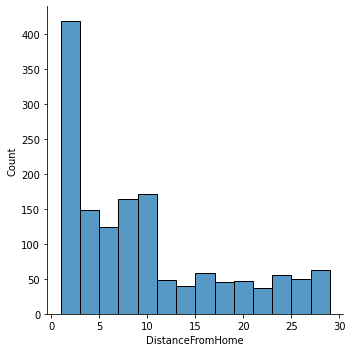

In [ ]:
sns.displot(data= df,x="DistanceFromHome",kind="hist")

In [ ]:
def Age_cat(x):
    if x['Age']<32:
        Age_cat = "18-31"
    elif x["Age"]<46:
        Age_cat = "32-45"
    else:
        Age_cat="46-60"
    return Age_cat


def DistanceFromHome_cat(x):
    if x['DistanceFromHome']<8:
        DistanceFromHome_cat = "1-7"
    elif x["DistanceFromHome"]<15:
        DistanceFromHome_cat = "8-14"
    elif x["DistanceFromHome"]<22:
        DistanceFromHome_cat = "15-21"
    else:
        DistanceFromHome_cat="22-29"
    return DistanceFromHome_cat

In [ ]:
df_temp=df.copy()
df_temp["Age_cat"]=df_temp.apply(lambda x: Age_cat(x),axis=1)
df_temp["DistanceFromHome_cat"]=df_temp.apply(lambda x: DistanceFromHome_cat(x),axis=1)

In [ ]:
display(df_temp["Age_cat"].value_counts())
display(df_temp["DistanceFromHome_cat"].value_counts())

32-45    742
18-31    455
46-60    273
Name: Age_cat, dtype: int64

1-7      775
8-14     340
22-29    186
15-21    169
Name: DistanceFromHome_cat, dtype: int64

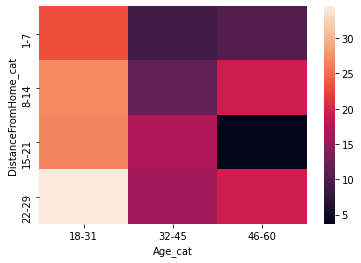

In [ ]:
c = df_temp[df_temp['Attrition']=="Yes"].groupby(["DistanceFromHome_cat", "Age_cat"]).size().unstack().reindex(["1-7","8-14","15-21","22-29"])
d = df_temp.groupby(["DistanceFromHome_cat", "Age_cat"]).size().unstack().reindex(["1-7","8-14","15-21","22-29"])
e = (c/d)*100
sns.heatmap(e)

### Relationship between MaritalStatus, Gender, Age, and Attrition

In [ ]:
def groupedbarplot(df, width=0.8, annotate="values", ax=None, **kw):
    ax = ax or plt.gca()
    n = len(df.columns)
    w = 1./n
    pos = (np.linspace(w/2., 1-w/2., n)-0.5)*width
    w *= width
    bars = []
    for col, x in zip(df.columns, pos):
        bars.append(ax.bar(np.arange(len(df))+x, df[col].values, width=w, **kw))
        # matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
        for val, xi in zip(df[col].values, np.arange(len(df))+x):
            if annotate:
                txt = val if annotate == "values" else col
                ax.annotate(txt, xy=(xi, val), xytext=(0,2), 
                            textcoords="offset points",
                            ha="center", va="bottom")
    ax.set_xticks(np.arange(len(df)))
    ax.set_xticklabels(df.index)
    return bars

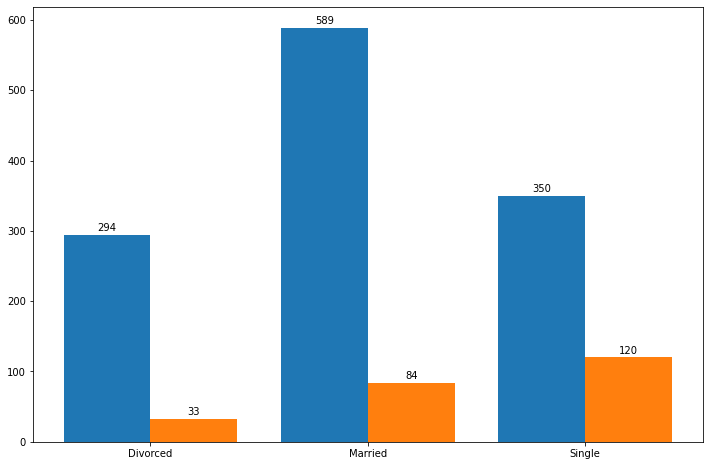

In [ ]:
counts = df.groupby(["MaritalStatus", "Attrition"]).size().unstack()
plt.figure(figsize=(12,8))
groupedbarplot(counts)
plt.show()

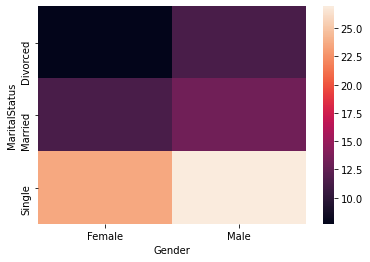

In [ ]:
c = df[df['Attrition']=='Yes'].groupby(["MaritalStatus", "Gender"]).size().unstack()
d = df.groupby(["MaritalStatus", "Gender"]).size().unstack()
e = (c/d)*100
sns.heatmap(e)

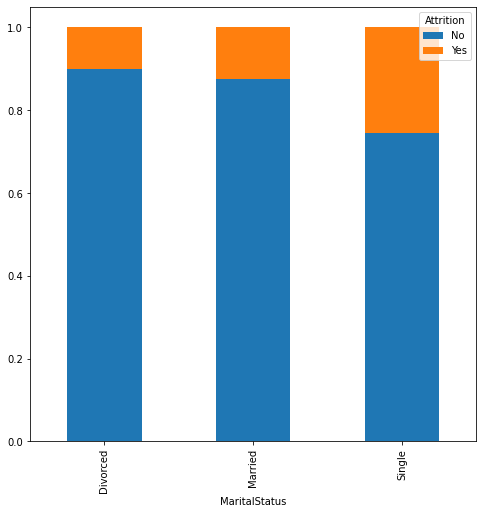

In [ ]:
CT = pd.crosstab(index=df["MaritalStatus"], columns=df["Attrition"])
CT = CT.div(CT.sum(1), axis=0)
CT = CT.plot(kind="bar", figsize=(8,8), stacked=True)

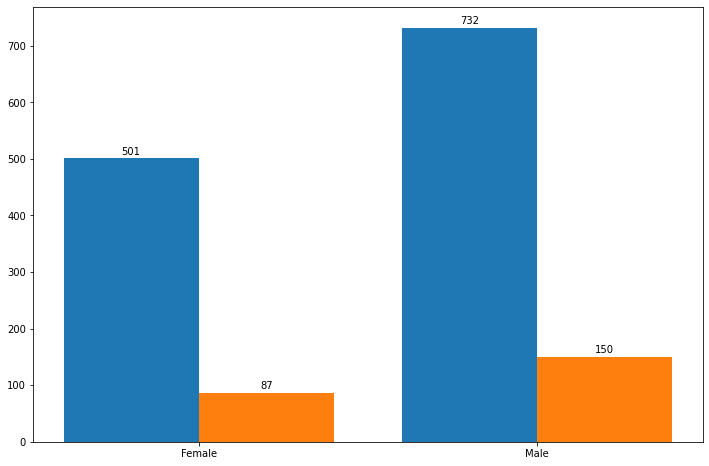

In [ ]:
counts = df.groupby(["Gender", "Attrition"]).size().unstack()
plt.figure(figsize=(12,8))
groupedbarplot(counts)
plt.show()

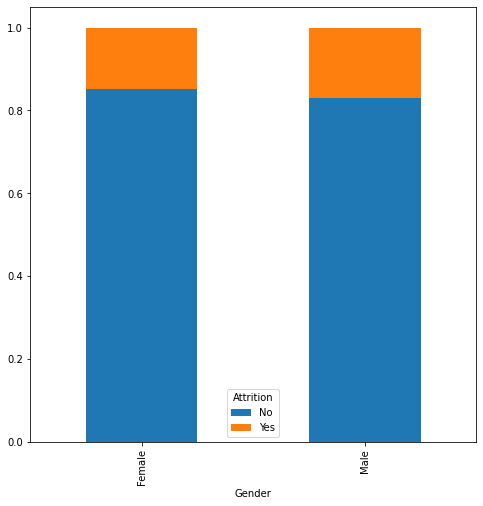

In [ ]:
CT = pd.crosstab(index=df["Gender"], columns=df["Attrition"])
CT = CT.div(CT.sum(1), axis=0)
CT = CT.plot(kind="bar", figsize=(8,8), stacked=True)

### Relationship between StockOptionLevel, YearsAtCompany, and Attrition

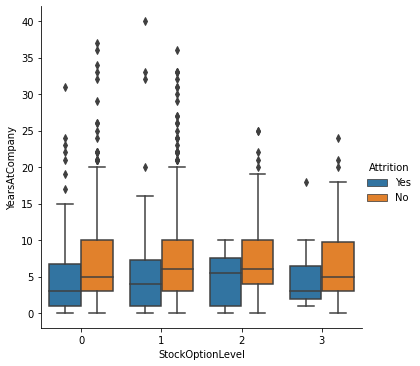

In [ ]:
p = sns.catplot(x="StockOptionLevel", y="YearsAtCompany", hue="Attrition", kind="box", data=df)

### Relationship between YearsWithCurrManager, Department, and Attrition

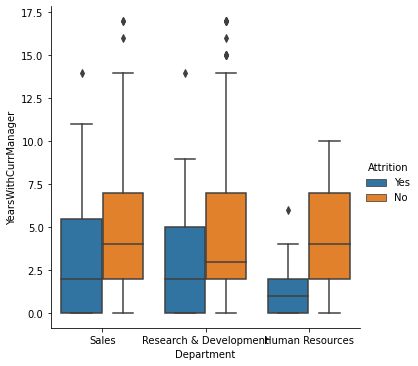

In [ ]:
p = sns.catplot(x="Department", y="YearsWithCurrManager", hue="Attrition", kind="box", data=df)

### Relationship between Education, MonthlyIncome, and Attrition

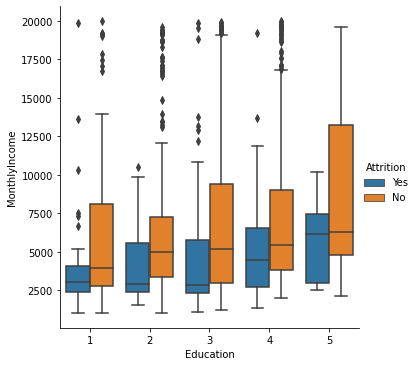

In [ ]:
p = sns.catplot(x="Education", y="MonthlyIncome", hue="Attrition", kind="box", data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

24.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

41.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

36.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



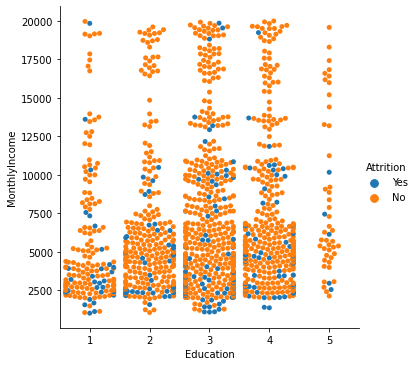

In [ ]:
p = sns.catplot(x="Education", y="MonthlyIncome", hue="Attrition", kind="swarm", data=df)

### Education vs Job Level vs Attrition

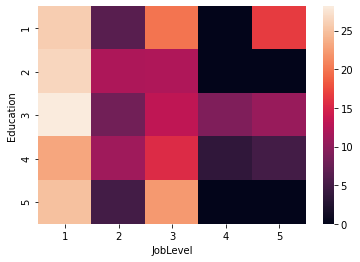

In [ ]:
c = df[df['Attrition']=='Yes'].groupby(["Education", "JobLevel"]).size().unstack().fillna(0)
d = df.groupby(["Education", "JobLevel"]).size().unstack()
e = (c/d)*100
sns.heatmap(e)

### Education vs Department vs Attrition

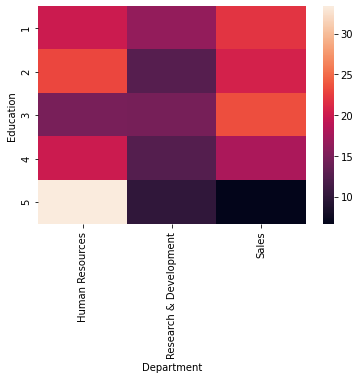

In [ ]:
c = df[df['Attrition']=='Yes'].groupby(["Education", "Department"]).size().unstack().fillna(0)
d = df.groupby(["Education", "Department"]).size().unstack()
e = (c/d)*100
sns.heatmap(e)

### Education vs JobRole vs Attrition

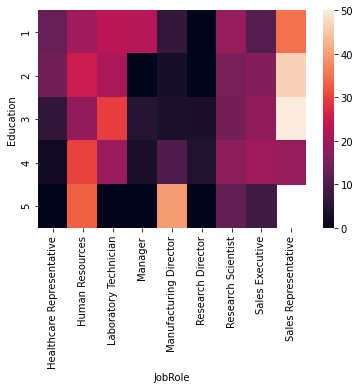

In [ ]:
c = df[df['Attrition']=='Yes'].groupby(["Education", "JobRole"]).size().unstack().fillna(0)
d = df.groupby(["Education", "JobRole"]).size().unstack()
e = (c/d)*100
sns.heatmap(e)

### MaritalStatus vs Overtime vs Atrrition

In [ ]:
e

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Education,,,,,,,,,
1,13.333333,20.000000,22.857143,22.222222,6.666667,0.000000,18.918919,11.111111,35.000000
2,14.285714,25.000000,21.052632,0.000000,3.030303,0.000000,15.217391,16.666667,46.666667
3,6.250000,18.181818,29.807692,5.000000,3.703704,3.333333,14.754098,18.333333,50.000000
4,2.272727,30.000000,18.965517,3.448276,10.526316,4.347826,17.721519,19.801980,18.750000
5,0.000000,33.333333,0.000000,0.000000,40.000000,0.000000,12.500000,8.333333,NaN


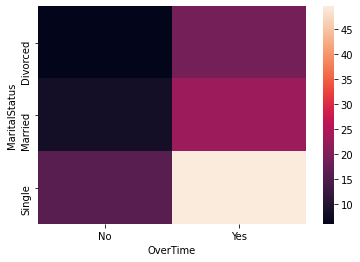

In [ ]:
c = df[df['Attrition']=="Yes"].groupby(["MaritalStatus", "OverTime"]).size().unstack().fillna(0)
d = df.groupby(["MaritalStatus", "OverTime"]).size().unstack()
e = (c/d)*100
sns.heatmap(e)

### Education vs Salary vs Attrition

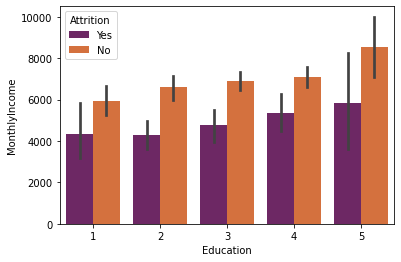

In [ ]:
sns.barplot(x = 'Education', y='MonthlyIncome', hue = 'Attrition', data = df, palette="inferno")

### Satisfaction vs Monthly Income vs Attrition

In [ ]:
pv1=df.pivot_table(index='Satisfaction',columns="Attrition",values="MonthlyIncome").reset_index()
pv1

Attrition,Satisfaction,No,Yes
0,1,6352.555556,4181.428571
1,2,9209.888889,5892.909091
2,3,7109.857143,4431.000000
3,4,6638.444444,4540.388889
4,6,7477.941176,5178.125000
5,8,6626.178218,4404.000000
6,9,7206.089552,4254.687500
7,12,6903.149733,4488.176471
8,16,6583.900990,7466.866667
9,18,6065.707692,4221.375000


In [ ]:
pv1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Satisfaction  16 non-null     int64  
 1   No            16 non-null     float64
 2   Yes           16 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 512.0 bytes


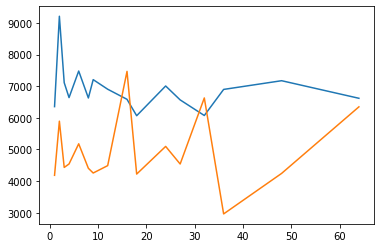

In [ ]:
plt.plot(pv1['Satisfaction'], pv1['No'])
plt.plot(pv1['Satisfaction'], pv1['Yes'])

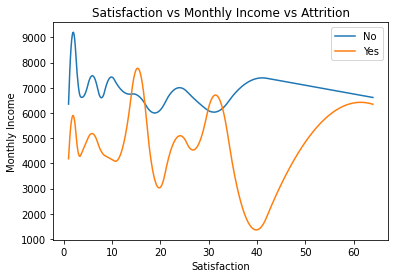

In [ ]:
x=np.array(pv1['Satisfaction'])
y1=np.array(pv1['No'])

xnew = np.linspace(x.min(), x.max(), 500) 

#define spline
spl = make_interp_spline(x, y1, k=2)
y_smooth = spl(xnew)

#create smooth line chart 
plt.plot(xnew, y_smooth,label="No")



y2=np.array(pv1['Yes'])

xnew = np.linspace(x.min(), x.max(), 500) 

#define spline
spl = make_interp_spline(x, y2, k=2)
y_smooth = spl(xnew)

#create smooth line chart 
plt.plot(xnew, y_smooth, label="Yes")
plt.legend()
plt.title("Satisfaction vs Monthly Income vs Attrition")
plt.xlabel("Satisfaction")
plt.ylabel("Monthly Income")
plt.show()

In [ ]:
df['YearsWithCurrManager'].value_counts()

2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
14      5
15      5
16      2
Name: YearsWithCurrManager, dtype: int64

### Over Time vs YearsWithCurrManager vs Attrition

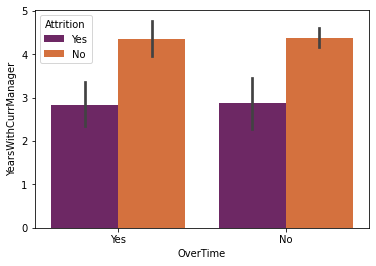

In [ ]:
sns.barplot(x = 'OverTime', y='YearsWithCurrManager', hue = 'Attrition', data = df, palette="inferno")

### Satisfaction vs YearsWithCurrManager vs Attrition

In [ ]:
pv2=df.pivot_table(index='YearsWithCurrManager',columns="Attrition",values="Satisfaction",fill_value=0).reset_index()
pv2

Attrition,YearsWithCurrManager,No,Yes
0,0,21.926966,16.211765
1,1,23.430769,19.090909
2,2,20.877551,16.220000
3,3,19.951220,10.842105
4,4,22.954023,14.545455
5,5,17.851852,19.000000
6,6,22.720000,29.000000
7,7,20.432432,15.806452
8,8,21.505155,24.300000
9,9,19.241379,15.666667


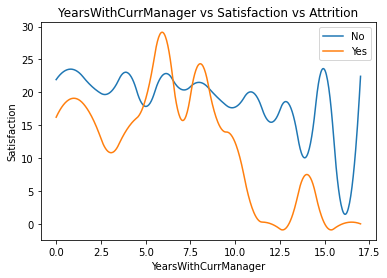

In [ ]:
x=np.array(pv2['YearsWithCurrManager'])
y1=np.array(pv2['No'])

xnew = np.linspace(x.min(), x.max(), 500) 

#define spline
spl = make_interp_spline(x, y1, k=2)
y_smooth = spl(xnew)

#create smooth line chart 
plt.plot(xnew, y_smooth,label="No")



y2=np.array(pv2['Yes'])

xnew = np.linspace(x.min(), x.max(), 500) 

#define spline
spl = make_interp_spline(x, y2, k=2)
y_smooth = spl(xnew)

#create smooth line chart 
plt.plot(xnew, y_smooth, label="Yes")
plt.legend()
plt.title("YearsWithCurrManager vs Satisfaction vs Attrition")
plt.xlabel("YearsWithCurrManager")
plt.ylabel("Satisfaction")
plt.show()

### Satisfaction vs YearsWithCurrManager vs Attrition

In [ ]:
pv3=df.pivot_table(index='Age',columns="Attrition",values="PercentSalaryHike",fill_value=0).reset_index()
pv3.head()

Attrition,Age,No,Yes
0,18,14.500000,12.750000
1,19,17.000000,18.666667
2,20,14.400000,15.000000
3,21,15.142857,15.166667
4,22,16.181818,17.200000


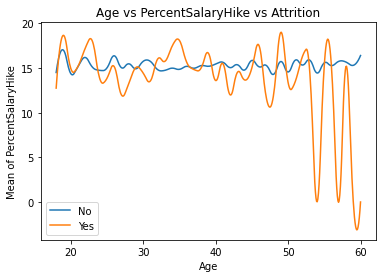

In [ ]:
x=np.array(pv3['Age'])
y1=np.array(pv3['No'])

xnew = np.linspace(x.min(), x.max(), 500) 

#define spline
spl = make_interp_spline(x, y1, k=2)
y_smooth = spl(xnew)

#create smooth line chart 
plt.plot(xnew, y_smooth,label="No")



y2=np.array(pv3['Yes'])

xnew = np.linspace(x.min(), x.max(), 500) 

#define spline
spl = make_interp_spline(x, y2, k=2)
y_smooth = spl(xnew)

#create smooth line chart 
plt.plot(xnew, y_smooth, label="Yes")
plt.legend()
plt.title("Age vs PercentSalaryHike vs Attrition")
plt.xlabel("Age")
plt.ylabel("Mean of PercentSalaryHike")
plt.show()

# Multicollinearity

<Figure size 576x360 with 0 Axes>

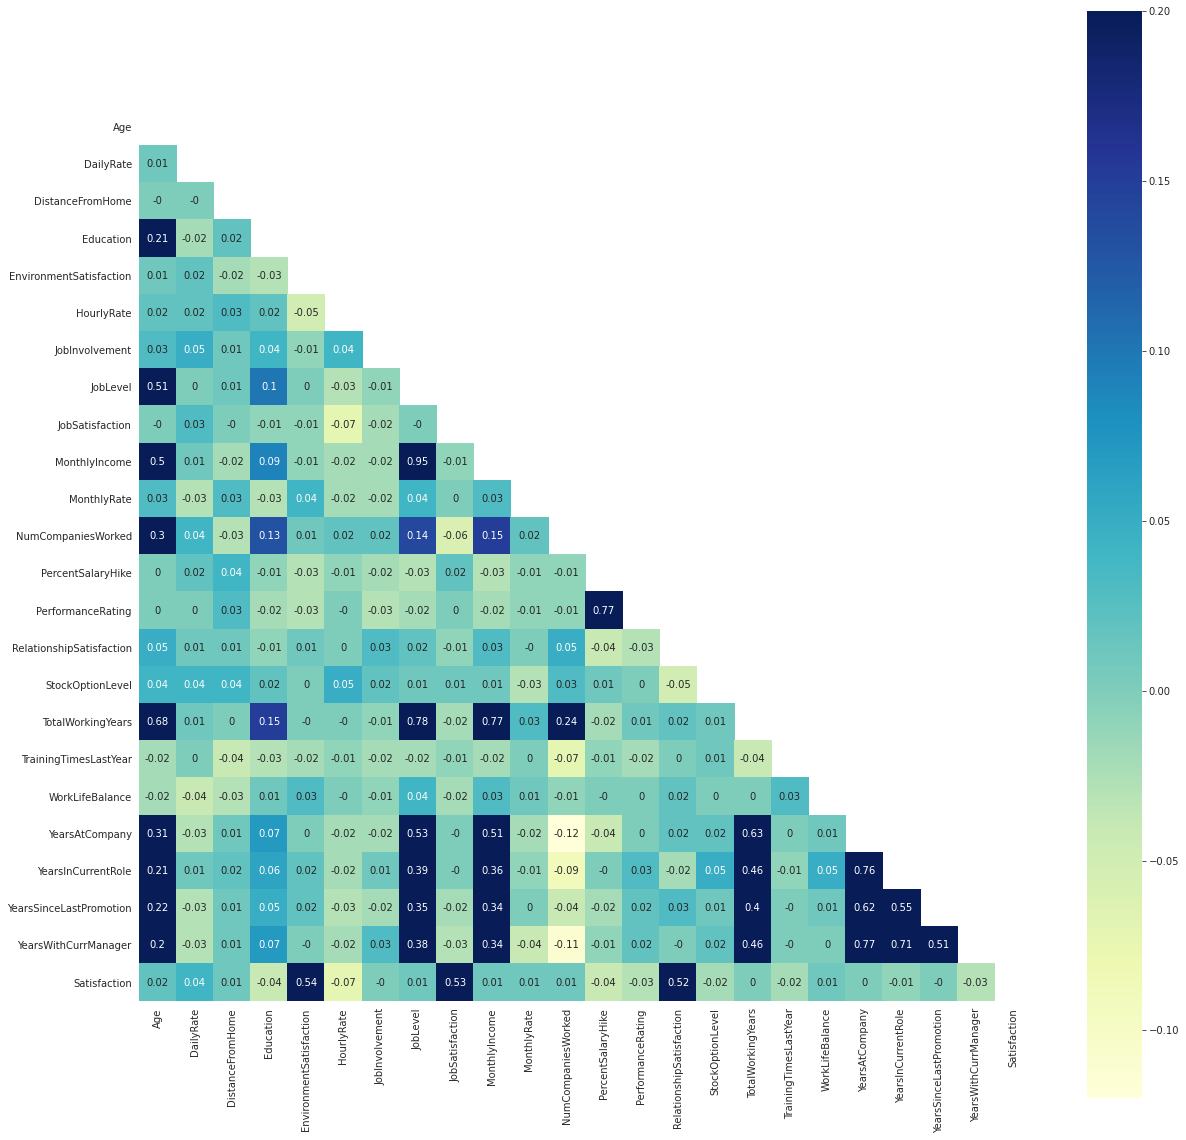

In [ ]:
corr_df=df.corr().round(2)
max_corr = 0.2
plt.figure(figsize=(8,5))
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr_df, mask=mask,vmax=max_corr, square=True, annot=True, cmap="YlGnBu")

Disini akan dihapus variabel yang mempunyai korelasi > 0.5 dengan variabel lainnya

In [ ]:
df=df.drop(['Age',
           'EnvironmentSatisfaction',
           'JobLevel',
           'JobSatisfaction',
           'PerformanceRating',
           'RelationshipSatisfaction',
           'TotalWorkingYears',
           'YearsAtCompany',
           'YearsInCurrentRole',
           'YearsSinceLastPromotion'],axis=1)

In [ ]:
display(df.head())
display(df.shape)

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,Gender,HourlyRate,JobInvolvement,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsWithCurrManager,Satisfaction
0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,Female,94,3,Sales Executive,Single,5993,19479,8,Yes,11,0,0,1,5,8
1,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,Male,61,2,Research Scientist,Married,5130,24907,1,No,23,1,3,3,7,24
2,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,Male,92,2,Laboratory Technician,Single,2090,2396,6,Yes,15,0,3,3,0,24
3,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,Female,56,3,Research Scientist,Married,2909,23159,1,Yes,11,0,3,3,0,36
4,No,Travel_Rarely,591,Research & Development,2,1,Medical,Male,40,3,Laboratory Technician,Married,3468,16632,9,No,12,1,3,3,2,8


(1470, 22)

# One-Hot Encoding

In [ ]:
df.sample(5)

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,Gender,HourlyRate,JobInvolvement,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsWithCurrManager,Satisfaction
378,Yes,Non-Travel,1362,Sales,19,3,Marketing,Male,67,4,Sales Executive,Single,5304,4652,8,Yes,13,0,3,2,4,8
13,No,Travel_Rarely,1346,Research & Development,19,2,Medical,Male,93,3,Laboratory Technician,Divorced,2661,8758,0,No,11,1,2,3,2,24
559,No,Travel_Rarely,268,Research & Development,2,5,Medical,Male,92,3,Research Scientist,Married,3057,20471,6,Yes,13,1,0,1,1,24
372,No,Travel_Rarely,755,Research & Development,9,4,Life Sciences,Male,97,2,Healthcare Representative,Single,6540,19394,9,No,19,0,5,3,0,18
806,No,Travel_Rarely,994,Research & Development,7,4,Life Sciences,Male,87,3,Healthcare Representative,Single,10445,15322,7,No,19,0,4,3,0,16


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Attrition              1470 non-null   object
 1   BusinessTravel         1470 non-null   object
 2   DailyRate              1470 non-null   int64 
 3   Department             1470 non-null   object
 4   DistanceFromHome       1470 non-null   int64 
 5   Education              1470 non-null   int64 
 6   EducationField         1470 non-null   object
 7   Gender                 1470 non-null   object
 8   HourlyRate             1470 non-null   int64 
 9   JobInvolvement         1470 non-null   int64 
 10  JobRole                1470 non-null   object
 11  MaritalStatus          1470 non-null   object
 12  MonthlyIncome          1470 non-null   int64 
 13  MonthlyRate            1470 non-null   int64 
 14  NumCompaniesWorked     1470 non-null   int64 
 15  OverTime             

In [ ]:
df['Attrition'] = df['Attrition'].astype('category')
df['BusinessTravel'] = df['BusinessTravel'].astype('category')
df['Department'] = df['Department'].astype('category')
df['Education'] = df['Education'].astype('category')
df['EducationField'] = df['EducationField'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['JobInvolvement'] = df['JobInvolvement'].astype('category')
df['JobRole'] = df['JobRole'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')
df['OverTime'] = df['OverTime'].astype('category')
df['StockOptionLevel'] = df['StockOptionLevel'].astype('category')
df['WorkLifeBalance'] = df['WorkLifeBalance'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Attrition              1470 non-null   category
 1   BusinessTravel         1470 non-null   category
 2   DailyRate              1470 non-null   int64   
 3   Department             1470 non-null   category
 4   DistanceFromHome       1470 non-null   int64   
 5   Education              1470 non-null   category
 6   EducationField         1470 non-null   category
 7   Gender                 1470 non-null   category
 8   HourlyRate             1470 non-null   int64   
 9   JobInvolvement         1470 non-null   category
 10  JobRole                1470 non-null   category
 11  MaritalStatus          1470 non-null   category
 12  MonthlyIncome          1470 non-null   int64   
 13  MonthlyRate            1470 non-null   int64   
 14  NumCompaniesWorked     1470 non-null   i

In [ ]:
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
df.sample(3)

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,Gender,HourlyRate,JobInvolvement,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsWithCurrManager,Satisfaction
209,0,Travel_Rarely,644,Research & Development,1,4,Medical,Male,97,3,Healthcare Representative,Divorced,9396,12368,7,No,16,1,3,3,3,12
1046,0,Travel_Rarely,1467,Research & Development,20,3,Life Sciences,Male,49,3,Research Scientist,Single,3420,21158,1,No,13,0,3,2,3,24
1125,0,Travel_Frequently,995,Research & Development,2,1,Life Sciences,Male,87,3,Healthcare Representative,Divorced,8853,24483,1,No,19,1,0,4,3,16


In [ ]:
df2=df.copy()

In [ ]:
df2.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,Gender,HourlyRate,JobInvolvement,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsWithCurrManager,Satisfaction
0,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,Female,94,3,Sales Executive,Single,5993,19479,8,Yes,11,0,0,1,5,8
1,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,Male,61,2,Research Scientist,Married,5130,24907,1,No,23,1,3,3,7,24
2,1,Travel_Rarely,1373,Research & Development,2,2,Other,Male,92,2,Laboratory Technician,Single,2090,2396,6,Yes,15,0,3,3,0,24
3,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,Female,56,3,Research Scientist,Married,2909,23159,1,Yes,11,0,3,3,0,36
4,0,Travel_Rarely,591,Research & Development,2,1,Medical,Male,40,3,Laboratory Technician,Married,3468,16632,9,No,12,1,3,3,2,8


In [ ]:
df2.describe().columns

Index(['DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'TrainingTimesLastYear', 'YearsWithCurrManager', 'Satisfaction'],
      dtype='object')

# LOGISTIC REGRESSION


## Pembagian x dan y

In [ ]:
X=df2.drop(['Attrition'],axis=1)
X.head()

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,Gender,HourlyRate,JobInvolvement,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsWithCurrManager,Satisfaction
0,Travel_Rarely,1102,Sales,1,2,Life Sciences,Female,94,3,Sales Executive,Single,5993,19479,8,Yes,11,0,0,1,5,8
1,Travel_Frequently,279,Research & Development,8,1,Life Sciences,Male,61,2,Research Scientist,Married,5130,24907,1,No,23,1,3,3,7,24
2,Travel_Rarely,1373,Research & Development,2,2,Other,Male,92,2,Laboratory Technician,Single,2090,2396,6,Yes,15,0,3,3,0,24
3,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,Female,56,3,Research Scientist,Married,2909,23159,1,Yes,11,0,3,3,0,36
4,Travel_Rarely,591,Research & Development,2,1,Medical,Male,40,3,Laboratory Technician,Married,3468,16632,9,No,12,1,3,3,2,8


In [ ]:
y=df2['Attrition'].copy()
y.sample(3)

828     1
1229    0
558     0
Name: Attrition, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
X_encoded = pd.get_dummies(X, columns=
                           ['BusinessTravel','Department','Education','EducationField',
                            'Gender','JobInvolvement','JobRole',
                            'MaritalStatus','OverTime',
                            'StockOptionLevel','WorkLifeBalance'])
X_encoded.head()

,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TrainingTimesLastYear,YearsWithCurrManager,Satisfaction,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_1,Education_2,Education_3,Education_4,Education_5,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,1102,1,94,5993,19479,8,11,0,5,8,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0
1,279,8,61,5130,24907,1,23,3,7,24,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
2,1373,2,92,2090,2396,6,15,3,0,24,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0
3,1392,3,56,2909,23159,1,11,3,0,36,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0
4,591,2,40,3468,16632,9,12,3,2,8,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0


In [ ]:
X_encoded.shape

(1470, 55)

## Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=652)

In [ ]:
dtc = DecisionTreeClassifier()
start = dt.now()
dtc.fit(X_train,y_train)
print(dt.now()-start)

0:00:00.018274


In [ ]:
y_pred = dtc.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_pred)

0.5783092324805339

## Feature Importances by Random Forest

In [ ]:
rfc = RandomForestClassifier(
    random_state=23
    )
start = dt.now()
rfc.fit(X_train,y_train)
print(dt.now()-start)

0:00:00.273550


In [ ]:
y_pred = rfc.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_pred)

0.8429087875417131

In [ ]:
# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

In [ ]:
base_imp = imp_df(X_train.columns, rfc.feature_importances_)
base_imp.head(25) 

,feature,feature_importance
0,MonthlyIncome,0.097950
1,Satisfaction,0.069320
2,DailyRate,0.067326
3,MonthlyRate,0.056793
4,YearsWithCurrManager,0.055677
5,HourlyRate,0.052592
6,DistanceFromHome,0.052317
7,PercentSalaryHike,0.045247
8,NumCompaniesWorked,0.042504
9,TrainingTimesLastYear,0.032215


In [ ]:
base_imp[base_imp['feature_importance']>0.03]

,feature,feature_importance
0,MonthlyIncome,0.097950
1,Satisfaction,0.069320
2,DailyRate,0.067326
3,MonthlyRate,0.056793
4,YearsWithCurrManager,0.055677
5,HourlyRate,0.052592
6,DistanceFromHome,0.052317
7,PercentSalaryHike,0.045247
8,NumCompaniesWorked,0.042504
9,TrainingTimesLastYear,0.032215


## Feature Selection

In [ ]:
best_feature = list(base_imp[base_imp['feature_importance']>0.03]['feature'])

In [ ]:
X_train_selected = X_train[best_feature]
X_test_selected = X_test[best_feature]

In [ ]:
X_train_selected.head()

,MonthlyIncome,Satisfaction,DailyRate,MonthlyRate,YearsWithCurrManager,HourlyRate,DistanceFromHome,PercentSalaryHike,NumCompaniesWorked,TrainingTimesLastYear,OverTime_No,OverTime_Yes
1198,5368,36,530,16130,2,36,16,25,1,2,0,1
458,10932,9,1094,11373,1,58,28,15,3,2,1,0
1408,2647,48,571,13672,4,78,12,13,1,6,1,0
951,6151,6,256,22074,9,40,10,13,1,4,1,0
135,4941,16,216,2819,1,84,6,20,6,0,1,0


In [ ]:
X_train_selected.columns

Index(['MonthlyIncome', 'Satisfaction', 'DailyRate', 'MonthlyRate',
       'YearsWithCurrManager', 'HourlyRate', 'DistanceFromHome',
       'PercentSalaryHike', 'NumCompaniesWorked', 'TrainingTimesLastYear',
       'OverTime_No', 'OverTime_Yes'],
      dtype='object')

## Standardize

In [ ]:
# create a scaler object
std_scaler = StandardScaler()
std_scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# fit and transform the data
X_train_selected_std_2 = pd.DataFrame(std_scaler.fit_transform(X_train_selected), columns=X_train_selected.columns)

X_train_selected_std_2

,MonthlyIncome,Satisfaction,DailyRate,MonthlyRate,YearsWithCurrManager,HourlyRate,DistanceFromHome,PercentSalaryHike,NumCompaniesWorked,TrainingTimesLastYear,OverTime_No,OverTime_Yes
0,-0.231813,1.072283,-0.686797,0.253743,-0.597899,-1.476987,0.862154,2.678107,-0.665932,-0.639454,-1.594807,1.594807
1,0.946348,-0.738119,0.742279,-0.424011,-0.882023,-0.393765,2.353082,-0.054807,0.136975,-0.639454,0.627035,-0.627035
2,-0.807976,1.876906,-0.582910,-0.096461,-0.029650,0.590982,0.365178,-0.601390,-0.665932,2.444476,0.627035,-0.627035
3,-0.066015,-0.939275,-1.381065,1.100615,1.390972,-1.280037,0.116690,-0.601390,-0.665932,0.902511,0.627035,-0.627035
4,-0.322229,-0.268755,-1.482417,-1.642743,-0.882023,0.886406,-0.380286,1.311650,1.341336,-2.181418,0.627035,-0.627035
...,...,...,...,...,...,...,...,...,...,...,...,...
1097,0.382253,-0.805171,-1.664853,-0.353771,0.822723,-1.329275,0.116690,-0.328098,-0.665932,-0.639454,-1.594807,1.594807
1098,-0.418785,0.267660,-0.747609,1.700577,0.822723,-1.772411,-0.753018,-0.874681,0.538429,-0.639454,0.627035,-0.627035
1099,2.685214,-1.207482,-0.010266,0.208863,0.538599,1.477255,-0.628774,-0.328098,0.136975,0.902511,0.627035,-0.627035
1100,2.366535,1.072283,-0.278852,-1.064009,-0.313774,-0.098341,-0.877262,0.218484,0.939883,0.131529,0.627035,-0.627035


In [ ]:
# fit and transform the data
X_test_selected_std_2 = pd.DataFrame(std_scaler.fit_transform(X_test_selected), columns=X_test_selected.columns)

In [ ]:
y_train_2=y_train.copy()
y_test_2=y_test.copy()

## Modelling

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



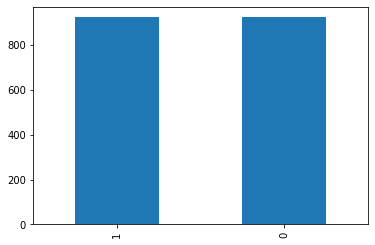

In [ ]:
sm = SMOTE(random_state=33)
X_train_selected_std_2, y_train_2 = sm.fit_sample(X_train_selected_std_2, y_train_2.ravel())
pd.Series(y_train_2).value_counts().plot.bar()

In [ ]:
# Menggunakan beberapa teknik klasifikasi untuk membandingkan akurasinya
# Metode Logistic Regression
classifierLR = LogisticRegression(random_state = 0, solver="saga")
classifierLR.fit(X_train_selected_std_2, y_train_2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Memprediksi hasil Test Set
y_pred_LR = classifierLR.predict(X_test_selected_std_2)    # logistic Regression

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Membuat Confusion Matrix
cm_LR = confusion_matrix(y_test_2, y_pred_LR, labels=[1,0])

In [ ]:
# Menilai akurasi masing-masing metode
akurasi_LR = ((cm_LR[0][0]+cm_LR[1][1])/(cm_LR[0][0]+cm_LR[1][1]+cm_LR[0][1]+cm_LR[1][0]))*100

print('LR ', akurasi_LR)

LR  73.91304347826086


Confusion matrix, without normalization


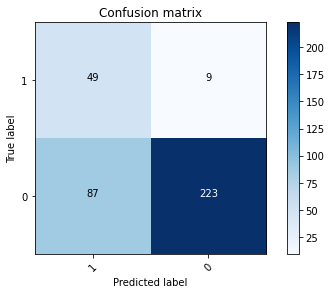

In [ ]:
plot_confusion_matrix(cm_LR, classes=[1,0])

In [ ]:
print(classification_report(y_test_2, y_pred_LR))

              precision    recall  f1-score   support

           0       0.96      0.72      0.82       310
           1       0.36      0.84      0.51        58

    accuracy                           0.74       368
   macro avg       0.66      0.78      0.66       368
weighted avg       0.87      0.74      0.77       368



In [ ]:
print('Recall = ', recall_score(y_test_2, y_pred_LR))

Recall =  0.8448275862068966


## Hyperparameter Tuning

In [ ]:
#List Hyperparameters yang akan diuji
penalty = ["l2","l1"]
C = np.logspace(-4,4,20)
solver= ["saga","liblinear"]


hyperparameters = dict(penalty=penalty, C=C,solver=solver)


logreg = LogisticRegression()


clf = GridSearchCV(logreg, hyperparameters, cv=5)



best_model = clf.fit(X_train_selected_std_2, y_train_2)

#Nilai hyperparameters terbaik
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best solver:', best_model.best_estimator_.get_params()['solver'])

Best Penalty: l1
Best C: 0.23357214690901212
Best solver: saga


LR  74.45652173913044
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       310
           1       0.37      0.84      0.51        58

    accuracy                           0.74       368
   macro avg       0.66      0.79      0.67       368
weighted avg       0.87      0.74      0.78       368



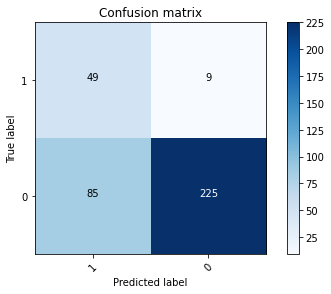

In [ ]:
# Menggunakan beberapa teknik klasifikasi untuk membandingkan akurasinya
# Metode Logistic Regression
classifierLR = LogisticRegression(penalty = "l1", C=0.23357214690901212,random_state = 0, solver="saga")
classifierLR.fit(X_train_selected_std_2, y_train_2)


y_pred_LR = classifierLR.predict(X_test_selected_std_2)
cm_LR = confusion_matrix(y_test_2, y_pred_LR, labels=[1,0])
akurasi_LR = ((cm_LR[0][0]+cm_LR[1][1])/(cm_LR[0][0]+cm_LR[1][1]+cm_LR[0][1]+cm_LR[1][0]))*100
print('LR ', akurasi_LR)

plot_confusion_matrix(cm_LR, classes=[1,0])
print(classification_report(y_test_2, y_pred_LR))

## PCA Viz 

Setelah mendapatkan model regresi logistik, kita dapat memvisualisasikan model tersebut dengan menggunakan PCA (Principal Component Analysis).

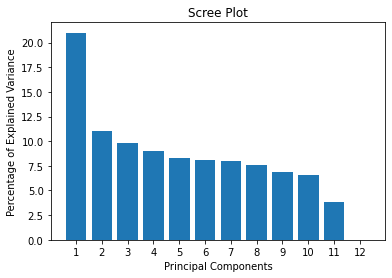

In [ ]:
pca = PCA() # NOTE: By default, PCA() centers the data, but does not scale it.
X_train_pca = pca.fit_transform(X_train_selected_std_2)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

In [ ]:
train_pc1_coords = X_train_pca[:, 0] 
train_pc2_coords = X_train_pca[:, 1]

pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

penalty = ["l2","l1"]
C = np.logspace(-4,4,20)
solver= ["saga","liblinear"]


hyperparameters = dict(penalty=penalty, C=C,solver=solver)

logreg = LogisticRegression()

clf = GridSearchCV(logreg, hyperparameters, cv=5)

best_model = clf.fit(pca_train_scaled, y_train_2)

#Nilai hyperparameters terbaik
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best solver:', best_model.best_estimator_.get_params()['solver'])

Best Penalty: l2
Best C: 0.0006951927961775605
Best solver: liblinear


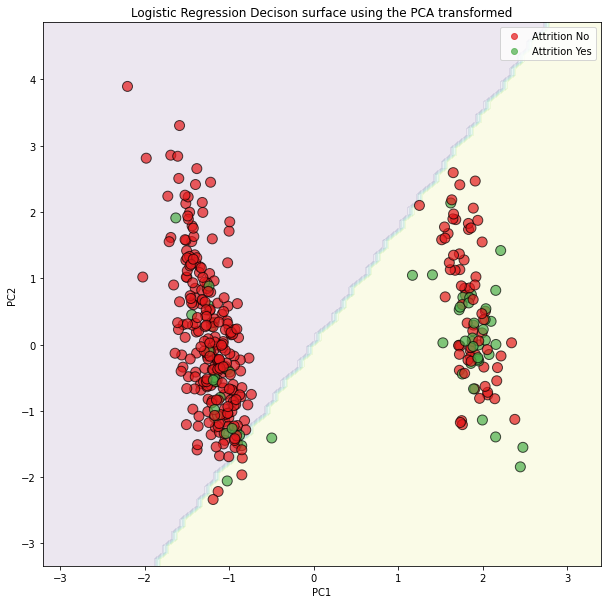

In [ ]:
clf_lr = LogisticRegression(penalty = "l2", C=0.0006951927961775605,random_state = 0, solver="liblinear")
clf_lr.fit(pca_train_scaled, y_train_2)

X_test_pca = pca.transform(X_test_selected_std_2)
test_pc1_coords = X_test_pca[:, 0] 
test_pc2_coords = X_test_pca[:, 1]

x_min = test_pc1_coords.min() - 1
x_max = test_pc1_coords.max() + 1

y_min = test_pc2_coords.min() - 1
y_max = test_pc2_coords.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                     np.arange(start=y_min, stop=y_max, step=0.1))

Z = clf_lr.predict(np.column_stack((xx.ravel(), yy.ravel())))
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10,10))
ax.contourf(xx, yy, Z, alpha=0.1)

cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])

scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_test, 
               cmap=cmap, 
               s=100, 
               edgecolors='k', ## 'k' = black
               alpha=0.7)

legend = ax.legend(scatter.legend_elements()[0], 
                   scatter.legend_elements()[1],
                    loc="upper right")
legend.get_texts()[0].set_text("Attrition No")
legend.get_texts()[1].set_text("Attrition Yes")

ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Logistic Regression Decison surface using the PCA transformed')
plt.show()

# SUPPORT VECTOR MACHINE

## Pembagian x dan y

In [ ]:
X=df2.drop(['Attrition'],axis=1)
X.head()

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,Gender,HourlyRate,JobInvolvement,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsWithCurrManager,Satisfaction
0,Travel_Rarely,1102,Sales,1,2,Life Sciences,Female,94,3,Sales Executive,Single,5993,19479,8,Yes,11,0,0,1,5,8
1,Travel_Frequently,279,Research & Development,8,1,Life Sciences,Male,61,2,Research Scientist,Married,5130,24907,1,No,23,1,3,3,7,24
2,Travel_Rarely,1373,Research & Development,2,2,Other,Male,92,2,Laboratory Technician,Single,2090,2396,6,Yes,15,0,3,3,0,24
3,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,Female,56,3,Research Scientist,Married,2909,23159,1,Yes,11,0,3,3,0,36
4,Travel_Rarely,591,Research & Development,2,1,Medical,Male,40,3,Laboratory Technician,Married,3468,16632,9,No,12,1,3,3,2,8


In [ ]:
y=df2['Attrition'].copy()
y.sample(3)

1087    0
1378    0
343     0
Name: Attrition, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
X_encoded = pd.get_dummies(X, columns=
                           ['BusinessTravel','Department','Education','EducationField',
                            'Gender','JobInvolvement','JobRole',
                            'MaritalStatus','OverTime',
                            'StockOptionLevel','WorkLifeBalance'])
X_encoded.head()

,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TrainingTimesLastYear,YearsWithCurrManager,Satisfaction,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_1,Education_2,Education_3,Education_4,Education_5,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,1102,1,94,5993,19479,8,11,0,5,8,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0
1,279,8,61,5130,24907,1,23,3,7,24,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
2,1373,2,92,2090,2396,6,15,3,0,24,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0
3,1392,3,56,2909,23159,1,11,3,0,36,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0
4,591,2,40,3468,16632,9,12,3,2,8,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0


In [ ]:
X_encoded.shape

(1470, 55)

## Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=652)

In [ ]:
dtc = DecisionTreeClassifier()
start = dt.now()
dtc.fit(X_train,y_train)
print(dt.now()-start)

0:00:00.019085


In [ ]:
y_pred = dtc.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_pred)

0.5755839822024472

## Feature Importances by Random Forest

In [ ]:
rfc = RandomForestClassifier(
    random_state=23
    )
start = dt.now()
rfc.fit(X_train,y_train)
print(dt.now()-start)

0:00:00.294949


In [ ]:
y_pred = rfc.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_pred)

0.8429087875417131

In [ ]:
# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

In [ ]:
base_imp = imp_df(X_train.columns, rfc.feature_importances_)
base_imp.head(25) 

,feature,feature_importance
0,MonthlyIncome,0.097950
1,Satisfaction,0.069320
2,DailyRate,0.067326
3,MonthlyRate,0.056793
4,YearsWithCurrManager,0.055677
5,HourlyRate,0.052592
6,DistanceFromHome,0.052317
7,PercentSalaryHike,0.045247
8,NumCompaniesWorked,0.042504
9,TrainingTimesLastYear,0.032215


In [ ]:
base_imp[base_imp['feature_importance']>0.03]

,feature,feature_importance
0,MonthlyIncome,0.097950
1,Satisfaction,0.069320
2,DailyRate,0.067326
3,MonthlyRate,0.056793
4,YearsWithCurrManager,0.055677
5,HourlyRate,0.052592
6,DistanceFromHome,0.052317
7,PercentSalaryHike,0.045247
8,NumCompaniesWorked,0.042504
9,TrainingTimesLastYear,0.032215


## Feature Selection

In [ ]:
best_feature = list(base_imp[base_imp['feature_importance']>0.03]['feature'])

In [ ]:
X_train_selected = X_train[best_feature]
X_test_selected = X_test[best_feature]

In [ ]:
X_train_selected.head()

,MonthlyIncome,Satisfaction,DailyRate,MonthlyRate,YearsWithCurrManager,HourlyRate,DistanceFromHome,PercentSalaryHike,NumCompaniesWorked,TrainingTimesLastYear,OverTime_No,OverTime_Yes
1198,5368,36,530,16130,2,36,16,25,1,2,0,1
458,10932,9,1094,11373,1,58,28,15,3,2,1,0
1408,2647,48,571,13672,4,78,12,13,1,6,1,0
951,6151,6,256,22074,9,40,10,13,1,4,1,0
135,4941,16,216,2819,1,84,6,20,6,0,1,0


In [ ]:
X_train_selected.columns

Index(['MonthlyIncome', 'Satisfaction', 'DailyRate', 'MonthlyRate',
       'YearsWithCurrManager', 'HourlyRate', 'DistanceFromHome',
       'PercentSalaryHike', 'NumCompaniesWorked', 'TrainingTimesLastYear',
       'OverTime_No', 'OverTime_Yes'],
      dtype='object')

## Standardize

In [ ]:
# create a scaler object
std_scaler = StandardScaler()
std_scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# fit and transform the data
X_train_selected_std_2 = pd.DataFrame(std_scaler.fit_transform(X_train_selected), columns=X_train_selected.columns)

X_train_selected_std_2

,MonthlyIncome,Satisfaction,DailyRate,MonthlyRate,YearsWithCurrManager,HourlyRate,DistanceFromHome,PercentSalaryHike,NumCompaniesWorked,TrainingTimesLastYear,OverTime_No,OverTime_Yes
0,-0.231813,1.072283,-0.686797,0.253743,-0.597899,-1.476987,0.862154,2.678107,-0.665932,-0.639454,-1.594807,1.594807
1,0.946348,-0.738119,0.742279,-0.424011,-0.882023,-0.393765,2.353082,-0.054807,0.136975,-0.639454,0.627035,-0.627035
2,-0.807976,1.876906,-0.582910,-0.096461,-0.029650,0.590982,0.365178,-0.601390,-0.665932,2.444476,0.627035,-0.627035
3,-0.066015,-0.939275,-1.381065,1.100615,1.390972,-1.280037,0.116690,-0.601390,-0.665932,0.902511,0.627035,-0.627035
4,-0.322229,-0.268755,-1.482417,-1.642743,-0.882023,0.886406,-0.380286,1.311650,1.341336,-2.181418,0.627035,-0.627035
...,...,...,...,...,...,...,...,...,...,...,...,...
1097,0.382253,-0.805171,-1.664853,-0.353771,0.822723,-1.329275,0.116690,-0.328098,-0.665932,-0.639454,-1.594807,1.594807
1098,-0.418785,0.267660,-0.747609,1.700577,0.822723,-1.772411,-0.753018,-0.874681,0.538429,-0.639454,0.627035,-0.627035
1099,2.685214,-1.207482,-0.010266,0.208863,0.538599,1.477255,-0.628774,-0.328098,0.136975,0.902511,0.627035,-0.627035
1100,2.366535,1.072283,-0.278852,-1.064009,-0.313774,-0.098341,-0.877262,0.218484,0.939883,0.131529,0.627035,-0.627035


In [ ]:
# fit and transform the data
X_test_selected_std_2 = pd.DataFrame(std_scaler.fit_transform(X_test_selected), columns=X_test_selected.columns)

In [ ]:
y_train_2=y_train.copy()
y_test_2=y_test.copy()

## Modelling

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



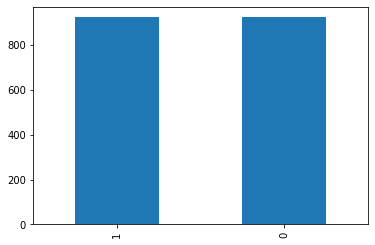

In [ ]:
sm = SMOTE(random_state=33)
X_train_selected_std_2, y_train_2 = sm.fit_sample(X_train_selected_std_2, y_train_2.ravel())
pd.Series(y_train_2).value_counts().plot.bar()

In [ ]:
# Metode SVM
classifierSVM = SVC(kernel = 'linear', random_state = 0, C=1000)
classifierSVM.fit(X_train_selected_std_2, y_train_2)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Memprediksi hasil Test Set
y_pred_SVM = classifierSVM.predict(X_test_selected_std_2)  # SVM

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Membuat Confusion Matrix
cm_SVM = confusion_matrix(y_test_2, y_pred_SVM, labels=[1,0])

In [ ]:
# Menilai akurasi masing-masing metode
akurasi_SVM = ((cm_SVM[0][0]+cm_SVM[1][1])/(cm_SVM[0][0]+cm_SVM[1][1]+cm_SVM[0][1]+cm_SVM[1][0]))*100
print('SVM ', akurasi_SVM)

SVM  73.91304347826086


Confusion matrix, without normalization


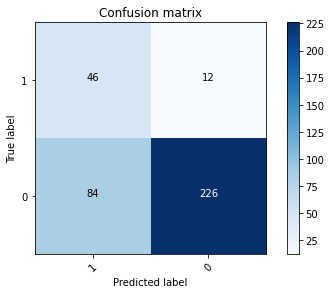

In [ ]:
plot_confusion_matrix(cm_SVM, classes=[1,0])

In [ ]:
print(classification_report(y_test_2, y_pred_SVM))

              precision    recall  f1-score   support

           0       0.95      0.73      0.82       310
           1       0.35      0.79      0.49        58

    accuracy                           0.74       368
   macro avg       0.65      0.76      0.66       368
weighted avg       0.86      0.74      0.77       368



## Hyperparameter Tuning

In [ ]:
param_grid = [
  {'C': [0.5, 1, 10, 100, 1000], 
   'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001], 
   'kernel': ['linear']},
]

optimal_params = GridSearchCV(
        SVC(), 
        param_grid,
        cv=5, 
        verbose=0
    )

optimal_params.fit(X_train_selected_std_2, y_train_2)
print(optimal_params.best_params_)

{'C': 0.5, 'gamma': 'scale', 'kernel': 'linear'}


SVM  73.91304347826086
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.95      0.73      0.82       310
           1       0.35      0.79      0.49        58

    accuracy                           0.74       368
   macro avg       0.65      0.76      0.66       368
weighted avg       0.86      0.74      0.77       368



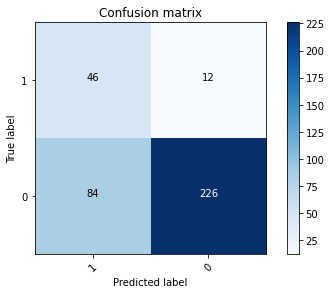

In [ ]:
# Metode SVM
classifierSVM = SVC(C=0.5, kernel = 'linear', gamma='scale')
classifierSVM.fit(X_train_selected_std_2, y_train_2)

y_pred_SVM = classifierSVM.predict(X_test_selected_std_2)

cm_SVM = confusion_matrix(y_test_2, y_pred_SVM, labels=[1,0])
akurasi_SVM = ((cm_SVM[0][0]+cm_SVM[1][1])/(cm_SVM[0][0]+cm_SVM[1][1]+cm_SVM[0][1]+cm_SVM[1][0]))*100
print('SVM ', akurasi_SVM)

plot_confusion_matrix(cm_SVM, classes=[1,0])
print(classification_report(y_test_2, y_pred_SVM))

## PCA Viz 

Setelah mendapatkan model support vector machine, kita dapat memvisualisasikan model tersebut dengan menggunakan PCA (Principal Component Analysis).

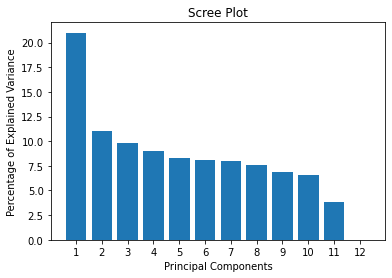

In [ ]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_selected_std_2)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

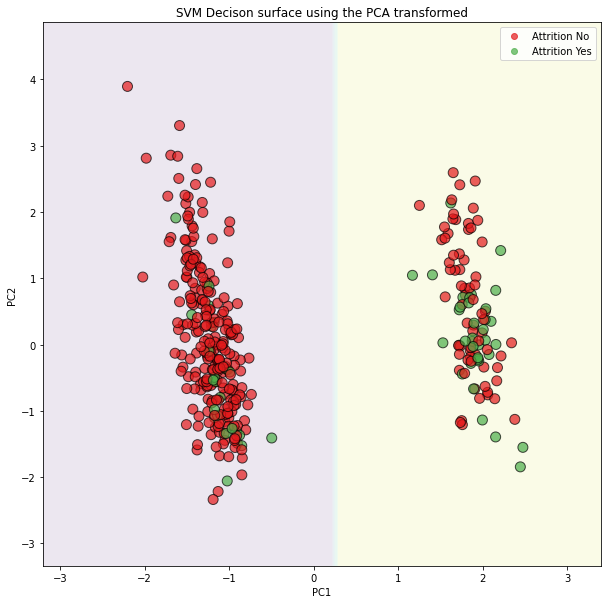

In [ ]:
clf_svm = SVC(C=1, kernel = 'linear', gamma='scale')
clf_svm.fit(pca_train_scaled, y_train_2)

X_test_pca = pca.transform(X_test_selected_std_2)
test_pc1_coords = X_test_pca[:, 0] 
test_pc2_coords = X_test_pca[:, 1]

x_min = test_pc1_coords.min() - 1
x_max = test_pc1_coords.max() + 1

y_min = test_pc2_coords.min() - 1
y_max = test_pc2_coords.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                     np.arange(start=y_min, stop=y_max, step=0.1))

Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10,10))
ax.contourf(xx, yy, Z, alpha=0.1)

cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])

scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_test, 
               cmap=cmap, 
               s=100, 
               edgecolors='k', ## 'k' = black
               alpha=0.7)

legend = ax.legend(scatter.legend_elements()[0], 
                   scatter.legend_elements()[1],
                    loc="upper right")
legend.get_texts()[0].set_text("Attrition No")
legend.get_texts()[1].set_text("Attrition Yes")

ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('SVM Decison surface using the PCA transformed')
plt.show()

# Model Selection

Akan dipilih model terbaik dari dua model diatas menggunakan nilai recall dan akurasi yang diperoleh dari cross validation. Pada kasus ini, recall lebih diutamakan dalam pemilihan model.

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Recall LR: 0.7302 (+/- 0.0472)
Recall SVM: 0.7367 (+/- 0.0505)


[Parallel(n_jobs=-2)]: Done  10 out of  10 | elapsed:    1.0s finished


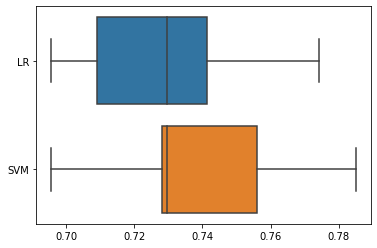

In [ ]:
kCV = 10
# Menggunakan parameter optimal
LR = LogisticRegression(penalty = "l1", C=0.23357214690901212,random_state = 0, solver="saga")
SVM = SVC(C=0.5, kernel = 'linear', gamma='scale')

models = ['LR','SVM']
lr_score = cross_val_score(LR, X_train_selected_std_2, y_train_2, cv=kCV, scoring='recall', n_jobs=-2, verbose=1)
svm_score = cross_val_score(SVM, X_train_selected_std_2, y_train_2, cv=kCV, scoring='recall', n_jobs=-2, verbose=1)
scores = [lr_score, svm_score]

data = {m:s for m,s in zip(models, scores)}
for name in data.keys():
    print("Recall %s: %0.4f (+/- %0.4f)" % (name, data[name].mean(), data[name].std() * 2))

sns.boxplot(data=pd.DataFrame(data), orient='h')
plt.show()

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


accuracy LR: 0.7096 (+/- 0.0514)
accuracy SVM: 0.7075 (+/- 0.0416)


[Parallel(n_jobs=-2)]: Done  10 out of  10 | elapsed:    1.0s finished


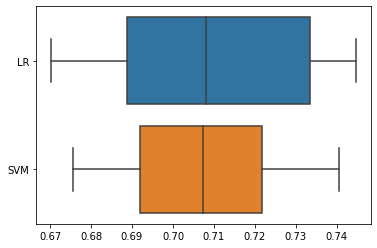

In [ ]:
kCV = 10
# Menggunakan parameter optimal
LR = LogisticRegression(penalty = "l1", C=0.23357214690901212,random_state = 0, solver="saga")
SVM = SVC(C=0.5, kernel = 'linear', gamma='scale')

models = ['LR','SVM']
lr_score = cross_val_score(LR, X_train_selected_std_2, y_train_2, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=1)
svm_score = cross_val_score(SVM, X_train_selected_std_2, y_train_2, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=1)
scores = [lr_score, svm_score]

data = {m:s for m,s in zip(models, scores)}
for name in data.keys():
    print("accuracy %s: %0.4f (+/- %0.4f)" % (name, data[name].mean(), data[name].std() * 2))

sns.boxplot(data=pd.DataFrame(data), orient='h')
plt.show()